In [1]:
import warnings
warnings.simplefilter('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
print(tf. __version__)
import skillsnetwork

import keras 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import os
import pathlib
from scipy import signal
from scipy.io import wavfile
import re
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

sns.set_context('notebook')
sns.set_style('white')

2.16.1


[nltk_data] Downloading package punkt to C:\Users\Muhammad Umer
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Muhammad Umer
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Muhammad Umer
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Muhammad Umer
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import pandas as pd

symbols = {"TOT": "Total", "XOM": "Exxon", "CVX": "Chevron",
           "COP": "ConocoPhillips", "VLO": "Valero Energy"}
template_name = ("./financial_data/{}.csv")

quotes = {}
for symbol in symbols:
    data = pd.read_csv(
        template_name.format(symbol), index_col=0, parse_dates=True
    )
    quotes[symbols[symbol]] = data["open"]
quotes = pd.DataFrame(quotes)
quotes .head()

,Total,Exxon,Chevron,ConocoPhillips,Valero Energy
date,,,,,
2003-01-02,71.62,35.00,67.20,48.80,37.04
2003-01-03,72.12,35.25,67.82,49.53,38.13
2003-01-06,72.93,35.45,68.34,49.50,37.37
2003-01-07,72.40,36.05,69.75,49.85,37.46
2003-01-08,69.51,35.15,68.46,48.44,36.51


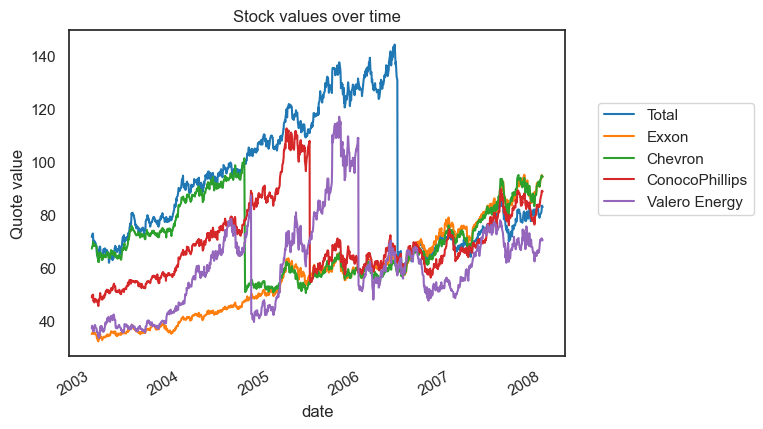

In [3]:
import matplotlib.pyplot as plt

quotes.plot()
plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Stock values over time")

In [4]:
data, target = quotes.drop(columns=["Chevron"]), quotes["Chevron"]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0)

In [5]:
data

,Total,Exxon,ConocoPhillips,Valero Energy
date,,,,
2003-01-02,71.62,35.00,48.80,37.04
2003-01-03,72.12,35.25,49.53,38.13
2003-01-06,72.93,35.45,49.50,37.37
2003-01-07,72.40,36.05,49.85,37.46
2003-01-08,69.51,35.15,48.44,36.51
...,...,...,...,...
2007-12-24,80.55,93.51,87.02,70.42
2007-12-26,81.10,93.66,87.68,70.92
2007-12-27,82.35,94.94,88.92,71.10


In [6]:
target

date
2003-01-02    67.20
2003-01-03    67.82
2003-01-06    68.34
2003-01-07    69.75
2003-01-08    68.46
              ...  
2007-12-24    93.63
2007-12-26    94.31
2007-12-27    94.80
2007-12-28    94.38
2007-12-31    94.37
Name: Chevron, Length: 1258, dtype: float64

In [7]:
regressor = DecisionTreeRegressor()
cv = ShuffleSplit(random_state=0)

In [8]:
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_test)
target_predicted = pd.Series(target_predicted, index=target_test.index)
target_predicted

date
2003-01-09    68.68
2004-12-17    52.57
2003-03-19    65.96
2006-11-29    70.46
2003-09-29    72.20
              ...  
2005-12-14    59.22
2006-12-22    72.83
2006-08-30    67.42
2004-10-28    53.50
2006-08-15    67.50
Length: 315, dtype: float64

In [9]:
from sklearn.metrics import r2_score

test_score = r2_score(target_test, target_predicted)
print(f"The R2 on this single split is: {test_score:.2f}")

The R2 on this single split is: 0.82


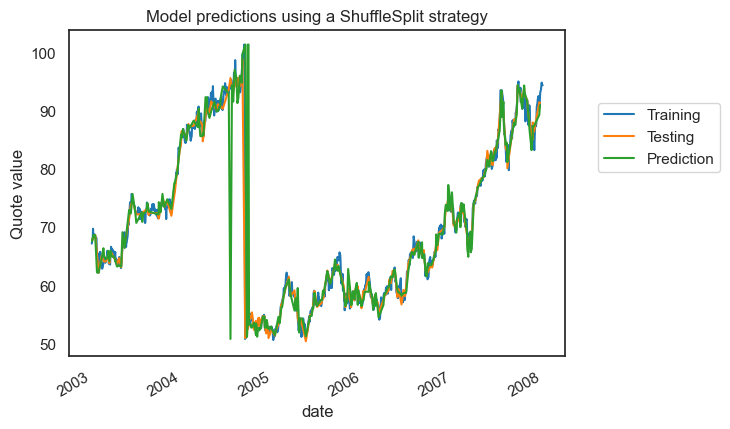

In [10]:
target_train.plot(label="Training")
target_test.plot(label="Testing")
target_predicted.plot(label="Prediction")

plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Model predictions using a ShuffleSplit strategy")

In [12]:
data_train, data_test, target_train, target_test = train_test_split(data, target, shuffle=False, random_state=0)
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_test)
target_predicted = pd.Series(target_predicted, index=target_test.index)

In [13]:
test_score = r2_score(target_test, target_predicted)
print(f"The R2 on this single split is: {test_score:.2f}")

The R2 on this single split is: -2.10


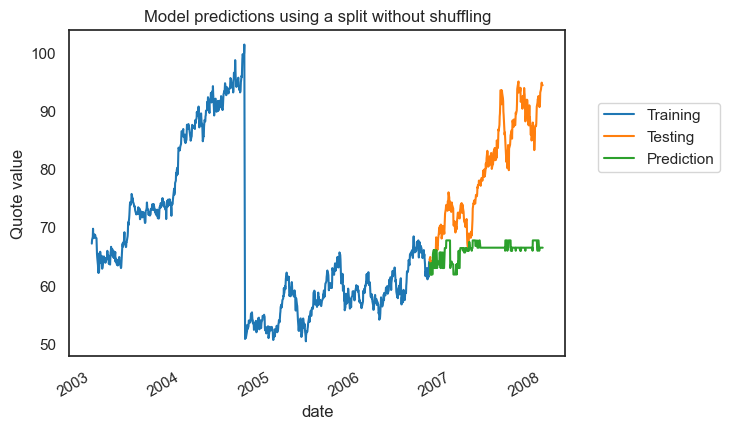

In [14]:
target_train.plot(label="Training")
target_test.plot(label="Testing")
target_predicted.plot(label="Prediction")

plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Model predictions using a split without shuffling")

## Understanding Sequential Modeling
## Forms of Sequential Data

Sequential data contains elements that are ordered into sequences. For example, time series (like stock values or sensor measurements), gene sequences (${C,G,A,T}$), speech, text (${a,...,z,0,...,9,...}$), video clips, and musical notes, and so on.

To summarize, sequential data has some temporal coherence, and can be of arbitrary lengths. A lot of tasks can be modeled from these types of data. For example:

*   text classification, such as spam email or not
*   language translation, such as French to English
*   time-series forecasting, such as stock prices prediction

Let us look at a few common sequential data sets, and understand pre-processing techniques associated with each.


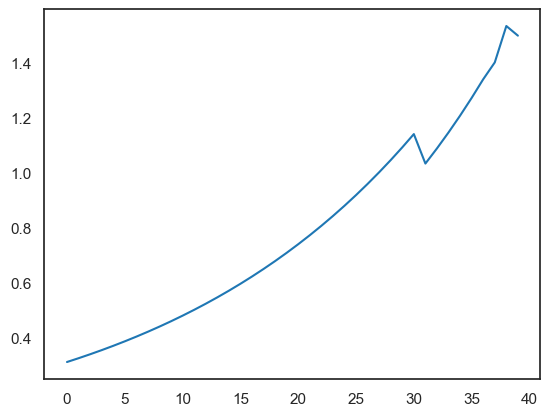

In [15]:
trend = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module4/L1/guinearice.csv', parse_dates=['date'], index_col='date')
trend.to_csv("guinearice.csv", index=False)
plt.plot(trend.values)

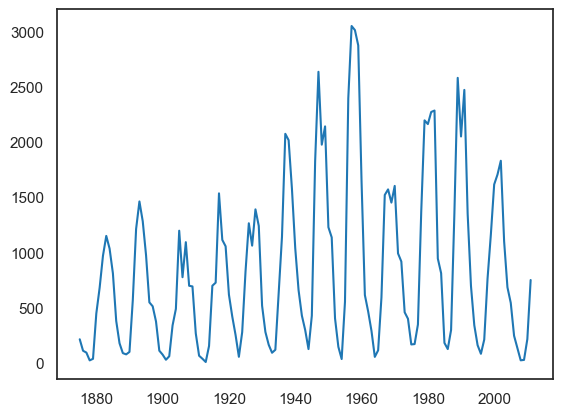

In [16]:
seasonality = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module4/L1/sunspotarea.csv', parse_dates=['date'], index_col='date')
seasonality.to_csv("sunspotarea.csv", index=False)
plt.plot(seasonality.value)

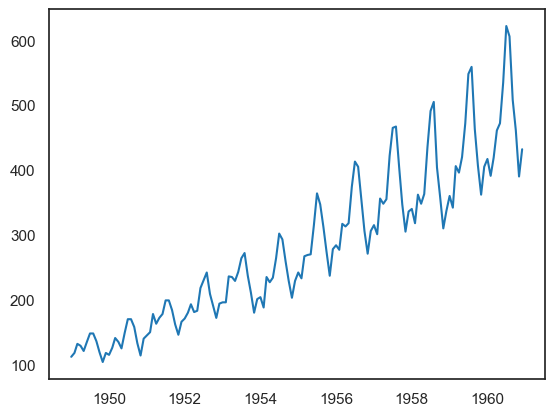

In [17]:
seasonality_trend = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module4/L1/AirPassengers.csv', parse_dates=['date'], index_col='date')
seasonality_trend.to_csv("AirPassengers.csv", index=False)
plt.plot(seasonality_trend.value)

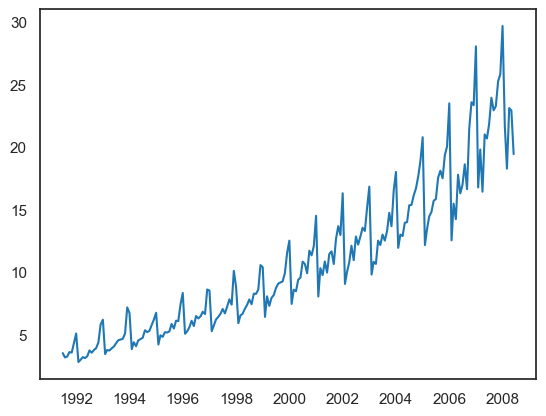

In [18]:
# Import Data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module4/L1/a10.csv', parse_dates=['date'], index_col='date')
df.to_csv("a10.csv", index=False)
plt.plot(df.value)

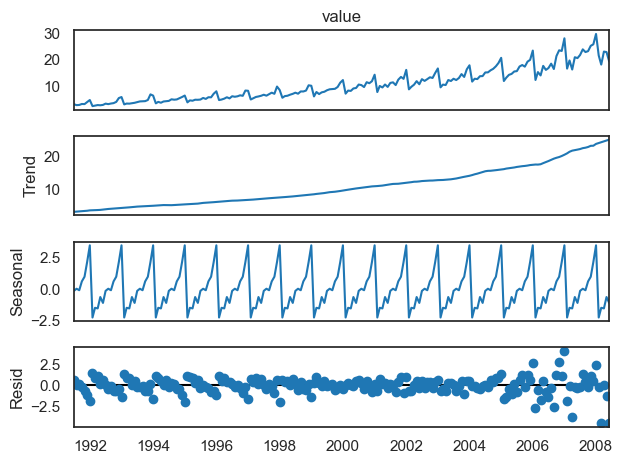

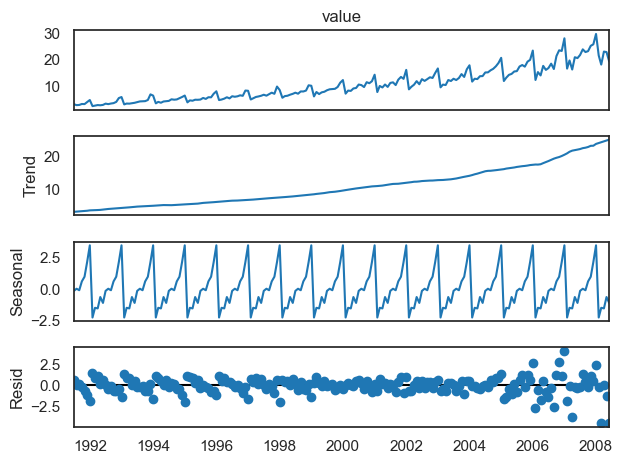

In [19]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
result_add.plot()

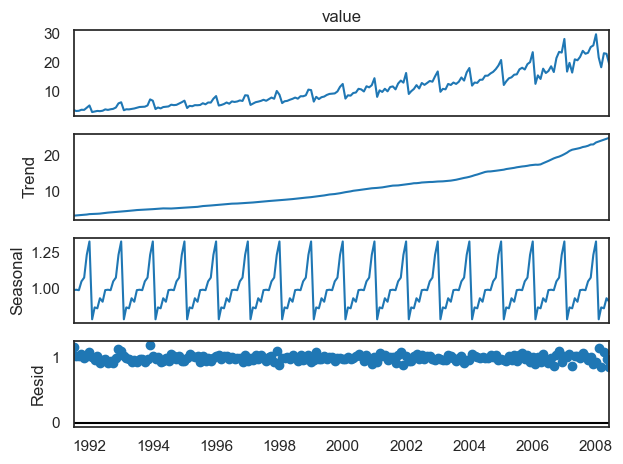

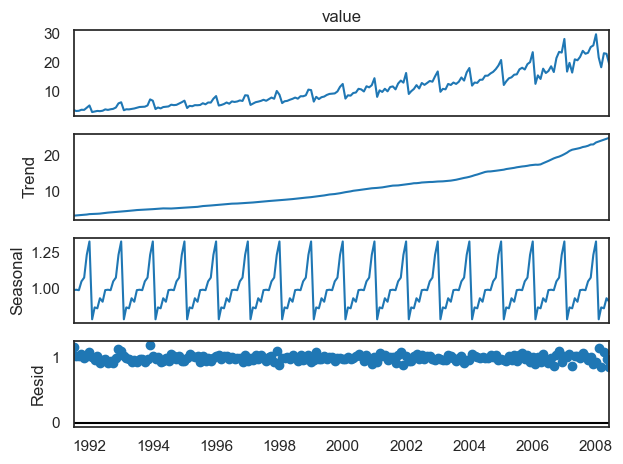

In [20]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

#Plot
result_mul.plot()

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

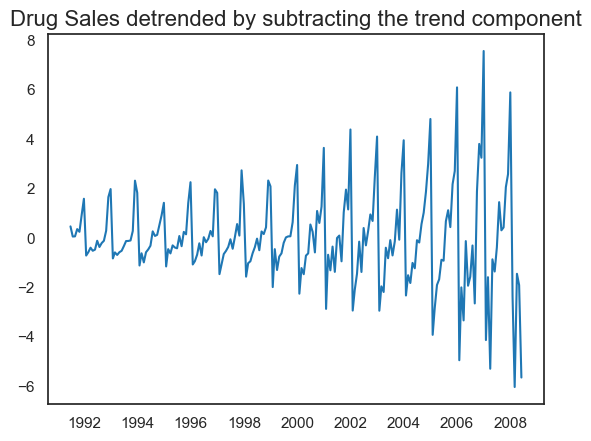

In [21]:
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

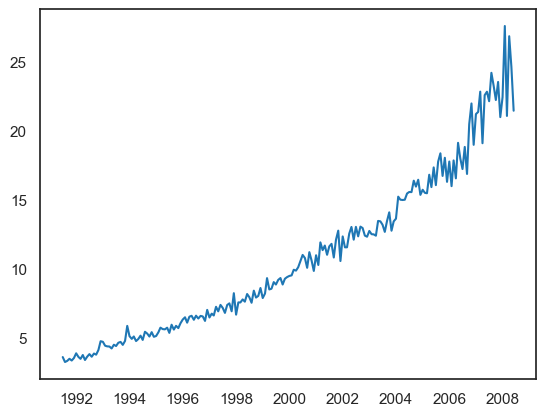

In [22]:
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)

In [23]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module4/L1/a10.csv', parse_dates=['date'], index_col='date')
df.to_csv("a10.csv", index=False)

<Axes: title={'center': 'Forward Fill (MSE: 0.0)'}, xlabel='date'>

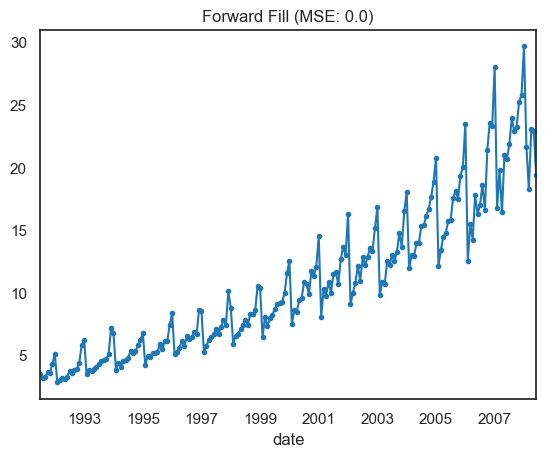

In [24]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df_ffill = df.ffill()
# Print the MSE between imputed value and ground truth
error = np.round(mean_squared_error(df['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", label='Forward Fill', style=".-")

<Axes: title={'center': 'Backward Fill (MSE: 0.0)'}, xlabel='date'>

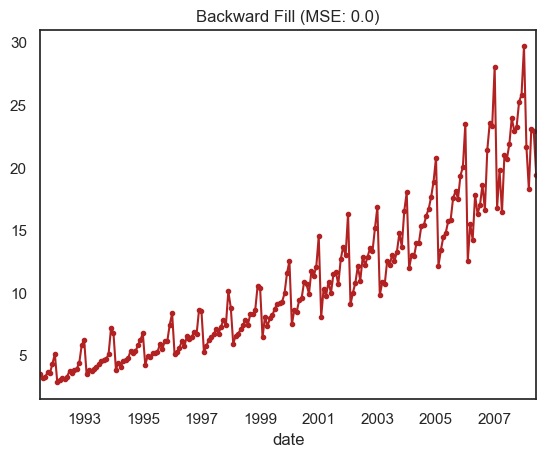

In [25]:
df_bfill = df.bfill()
error = np.round(mean_squared_error(df['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", label='Back Fill', color='firebrick', style=".-")


<Axes: title={'center': 'Linear Fill (MSE: 0.0)'}, xlabel='date'>

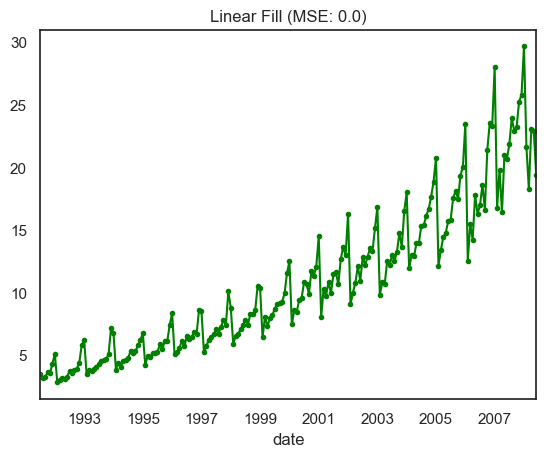

In [26]:
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")",label='Cubic Fill', color='green', style=".-")

In [27]:
cols = ['Id', 'Entity', 'Sentiment', 'Tweet']
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module4/L1/twitter_validation.csv', names = cols, header=None)
df.to_csv("twitter_validation.csv", index=False)

In [28]:
df.head()

,Id,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


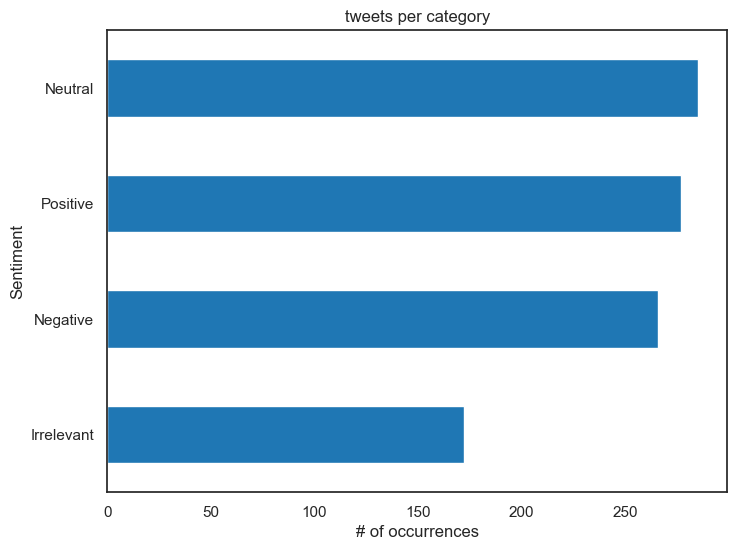

In [29]:
fig = plt.figure(figsize=(8,6))

df.groupby(['Sentiment']).Tweet.count().sort_values().plot.barh(
    ylim=0, title= 'tweets per category')

plt.xlabel('# of occurrences', fontsize = 12);

#### Cleaning up


In [30]:
def remove_punctuation(text):
    regular_punct = list(string.punctuation)
    for punc in regular_punct:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip().lower()

df['Tweet'] = df['Tweet'].apply(remove_punctuation)

In [32]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [33]:
df.head()

,Id,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects clai...
2,8312,Microsoft,Negative,microsoft why do i pay for word when it functi...
3,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,now the president is slapping americans in the...


In [34]:
def remove_stopwords(tweet):
    en_stops = set(stopwords.words('english'))
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in en_stops])  
    return tweet

df['Tweet'] = df['Tweet'].apply(remove_stopwords)

In [35]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [36]:
df['Tweet'] = df['Tweet'].apply(word_tokenize)

In [39]:
df

,Id,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,"[mentioned, facebook, struggling, motivation, ..."
1,352,Amazon,Neutral,"[bbc, news, amazon, boss, jeff, bezos, rejects..."
2,8312,Microsoft,Negative,"[microsoft, pay, word, functions, poorly, sams..."
3,4371,CS-GO,Negative,"[csgo, matchmaking, full, closet, hacking, tru..."
4,4433,Google,Neutral,"[president, slapping, americans, face, really,..."
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,"[⭐️, toronto, arts, culture, capital, canada, ..."
996,4359,CS-GO,Irrelevant,"[actually, good, move, tot, bring, viewers, on..."
997,2652,Borderlands,Positive,"[today, sucked, it, ’, s, time, drink, wine, n..."
998,8069,Microsoft,Positive,"[bought, fraction, microsoft, today, small, wins]"


#### Vectorization


In [40]:
# combine individual words

def combine_text(input):
    combined = ' '.join(input)
    return combined

df['Tweet'] = df['Tweet'].apply(combine_text)

In [41]:
df

,Id,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,microsoft pay word functions poorly samsungus ...
3,4371,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,president slapping americans face really commi...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ toronto arts culture capital canada it ’ s ...
996,4359,CS-GO,Irrelevant,actually good move tot bring viewers one peopl...
997,2652,Borderlands,Positive,today sucked it ’ s time drink wine n play bor...
998,8069,Microsoft,Positive,bought fraction microsoft today small wins


In [43]:
cv = CountVectorizer(ngram_range=(1, 1))
X_train_bow = cv.fit_transform(df['Tweet'])
print(X_train_bow[0:10, 0:10].todense())

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [44]:
cv = CountVectorizer(ngram_range=(1, 1))
X_train_bow = cv.fit_transform(df['Tweet'].values.tolist()) 
Y_train_bow = df['Sentiment']
Y_train_bow

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: Sentiment, Length: 1000, dtype: object

In [45]:
cv_bbow = CountVectorizer(ngram_range=(2, 2))
X_train_bbow = cv_bbow.fit_transform(df['Tweet']) 
Y_train_bbow = df['Sentiment']
Y_train_bbow

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: Sentiment, Length: 1000, dtype: object

In [46]:
vectorizer = TfidfVectorizer(use_idf = True, ngram_range=(1, 1))
vectorizer.fit(df)
X_train_tfidf = vectorizer.fit_transform(df['Tweet'])
Y_train_tfidf = df['Sentiment'] 
Y_train_tfidf 

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: Sentiment, Length: 1000, dtype: object

# Example 1 - Working with Speech Commands
